In [1]:
import pandas as pd

pd.options.mode.chained_assignment = None  # default='warn'

df = pd.read_csv("https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv")


In [2]:
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0
...,...,...,...,...,...,...
282514,2020-06-29,Sweetwater,Wyoming,56037.0,86,0
282515,2020-06-29,Teton,Wyoming,56039.0,128,1
282516,2020-06-29,Uinta,Wyoming,56041.0,174,0
282517,2020-06-29,Washakie,Wyoming,56043.0,38,5


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.columns


Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [5]:
df.describe()

,fips,cases,deaths
count,279574.000000,282519.000000,282519.000000
mean,30135.197579,455.702218,25.050984
std,15327.296860,3948.280720,348.681705
min,1001.000000,0.000000,0.000000
25%,18095.000000,6.000000,0.000000
50%,29075.000000,26.000000,1.000000
75%,45051.000000,127.000000,4.000000
max,56045.000000,219670.000000,21941.000000


In [6]:
nv_df = df[df['state'] == 'Nevada']

In [7]:
nv_df

,date,county,state,fips,cases,deaths
560,2020-03-05,Clark,Nevada,32003.0,1,0
561,2020-03-05,Washoe,Nevada,32031.0,1,0
621,2020-03-06,Clark,Nevada,32003.0,1,0
622,2020-03-06,Washoe,Nevada,32031.0,1,0
708,2020-03-07,Clark,Nevada,32003.0,1,0
...,...,...,...,...,...,...
281161,2020-06-29,Nye,Nevada,32023.0,108,3
281162,2020-06-29,Pershing,Nevada,32027.0,6,0
281163,2020-06-29,Storey,Nevada,32029.0,2,0
281164,2020-06-29,Washoe,Nevada,32031.0,2656,75


In [8]:
washoe_df = nv_df[nv_df['county'] == 'Washoe']

In [9]:
clark_df = nv_df[nv_df['county'] == 'Clark']

In [10]:
washoe_population = 471500.0

washoe_df['cases_per_capita'] = washoe_df['cases'] / washoe_population

In [11]:
clark_population = 2200000.0
clark_df['cases_per_capita'] = clark_df['cases'] / clark_population

In [12]:
merged_df = pd.merge(clark_df, washoe_df, on='date',suffixes=('_clark','_washoe'))

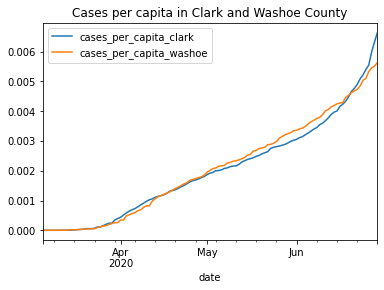

In [13]:
merged_df.plot(x='date',y=['cases_per_capita_clark','cases_per_capita_washoe'],title="Cases per capita in Clark and Washoe County")